# Tips for Large Amounts of Data

## 1. Glob

Sometimes you have a folder of data files you want to analyze. Glob is a package that makes reading in these files really easy.

In [1]:
import glob # OR os.listdir()
from astropy.io import fits
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
!ls 

M16gA.fits
M16rA.fits
M16uA.fits
d165_os_bs_ff_bp_crj.fits
example_shifting.ipynb
fig1.png
fig2.png
fig3.png
fig5.png
fig6.png
final_figure.eps
fitting_a_line_to_data.ipynb
good_and_bad_coding_practices.ipynb
good_and_bad_plotting_practices.ipynb
loops_and_parallelism.ipynb
making_rgb_images.ipynb
matrix_operations_with_numpy.ipynb
maxmimum_likelihood_worked_example.ipynb
psf_11stars.fits
psf_gaussian_51.fits
publication_graphics_and_errorbars.ipynb
reading_fits_files.ipynb
spSpec-51788-0401-161.fit
test_figure.png
test_figure_hires.eps
test_figure_hires.png
tips_for_large_amounts_of_data.ipynb


In [3]:
!ls sample_data/

ls: sample_data/: No such file or directory


0
[]


Text(0, 0.5, 'Flux [arb. units]')

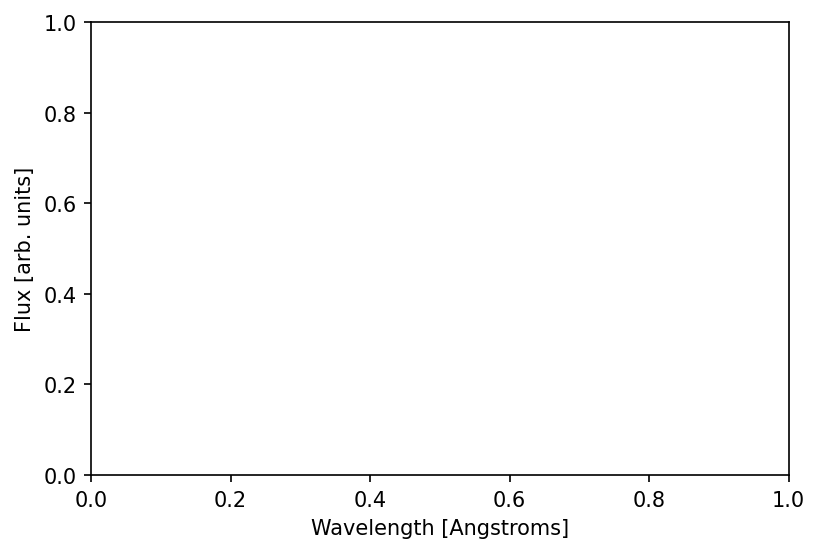

In [4]:
# these are fits tables of specta which i want to load into memory
files = sorted(glob.glob('sample_data/*'))

print(len(files))
print(files[0:5])


plt.figure(dpi=150)
for file in files:
    with fits.open(file) as f:
        w = f[0].header['CRVAL1'] + f[0].header['CDELT1']*np.arange(f[0].header['NAXIS1'])
        s = f[0].data
        plt.plot(w,s)
        f.close()
        

plt.xlabel('Wavelength [Angstroms]')
plt.ylabel('Flux [arb. units]')

## 2. Avoid append

Every time you call .append(), Python makes a new identical array with one extra empty element (effectively doubling current memory use!). When you have hundreds/thousands of images, this uses **LOTS** of memory.

Instead, try pre-making arrays and assigning values:

In [5]:
def assign():
    t = time.time()
    
    
    spec = np.zeros((len(files),len(s)))

    for i, file in enumerate(files):
        f = fits.open(file)
        spec[i] = f[0].data
        f.close()
    print(time.time() - t)

In [6]:
assign()

NameError: name 's' is not defined

## 3. Separate data processing into multiple notebooks and many functions.

Saves on memory, makes more efficient so you don't have to keep recording the same things, can iterate quickly.

For example, break up code into chunks/functions/notebooks that might look something like:

* load_in_image(file_name) --> save output
* process_image(file_name) --> save output
* make_measurement_from_image(file_name) --> save output
* plot_image_analysis(file_name) --> save output

Sometimes, if you're dealing with $\texttt{numpy}$ arrays and people using Python, saving things as .npy files can be nice! This is done with np.save()/np.savez(). Otherwise, I always think simple text files or .csv's are **always** easier.

## 4. Take a few minutes to think about code efficiency *before* you code. Think about speed and memory, and remember to utilize Numpy functions!

## 5. Feel free to add print statements with updates on where you are at in the code! It can be both fun and informative!

tqdm

Be careful, though! Don't print every iteration in a loop for example because printing itself is slow. Try to print every n'th pass, or something.

## 6. Consider reading in the data only once, and then using subsets of a larger array.

In [21]:
all_images = np.random.rand(50,100,100)

# each image is now along the first dimension

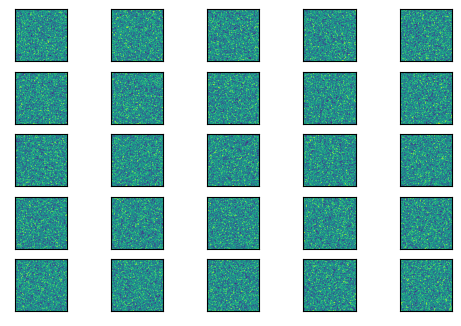

In [22]:
fig, axes = plt.subplots(5,5,dpi=100)
for i, ax in enumerate(axes.flat):
    ax.imshow(all_images[i])
    plt.xlabel('')
    plt.ylabel('')
    ax.set_xticks([])
    ax.set_yticks([])